# Blood Cancer Detection Using CNN Algotithm

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
#to get data from
!wget https://www.dropbox.com/sh/zh3dbchrafaqge4/AACIfYbVN7TRCWsRYsX9jZaka?dl=0

--2021-12-24 16:43:47--  https://www.dropbox.com/sh/zh3dbchrafaqge4/AACIfYbVN7TRCWsRYsX9jZaka?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/zh3dbchrafaqge4/AACIfYbVN7TRCWsRYsX9jZaka [following]
--2021-12-24 16:43:47--  https://www.dropbox.com/sh/raw/zh3dbchrafaqge4/AACIfYbVN7TRCWsRYsX9jZaka
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc983ed3ef614ddf38f4b2ebc58c.dl.dropboxusercontent.com/zip_download_get/A_2MVE9fsi5iwY5D_AG1Vd3VzwdUA0tOtHGk8rtrAVUjdcamEVJ86xxh_QYOuB5zudQyEsb4xF3ApbEFYNhr3YIa46nsovtkZr4gbrEYqLyzcA# [following]
--2021-12-24 16:43:48--  https://uc983ed3ef614ddf38f4b2ebc58c.dl.dropboxusercontent.com/zip_download_get/A_2MVE9fsi5iwY5D_AG1Vd3VzwdUA0tOtHGk8rtrAVUjdcamEVJ86xxh_QYOuB5zudQyEsb4xF3ApbEF

In [ ]:
!unzip /content/AACIfYbVN7TRCWsRYsX9jZaka?dl=0

Archive:  /content/AACIfYbVN7TRCWsRYsX9jZaka?dl=0
mapname:  conversion of  failed
   creating: Blood_Cancer_Detection/
   creating: Blood_Cancer_Detection/No/
   creating: Blood_Cancer_Detection/Yes/
 extracting: Blood_Cancer_Detection/No/Normal_30.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_19.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_17.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_13.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_42.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_31.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_12.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_57.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_52.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_49.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_18.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_20.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_04.jpeg  
 extracting: Blood_Cancer_Detection/No/Normal_26.jpeg  
 extracting: Blo

In [ ]:
#import some libriries
from IPython.core.display import Image
import numpy as np
import matplotlib.pyplot as plt 
import os 
import math
import shutil 
import glob 
from PIL import Image

In [ ]:
#count the number of images
ROOT_DIR="/content/Blood_Cancer_Detection"
number_of_images ={}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))


In [ ]:
#shows count of images 
number_of_images.items()


dict_items([('Yes', 42), ('No', 58)])

In [ ]:
#shows folders in directives
os.listdir("/content/Blood_Cancer_Detection")

['Yes', 'No']

In [ ]:
#shows length of directives
len(os.listdir("/content/Blood_Cancer_Detection"))

2

##### We will split the data 
 * 70% for Train Data
 * 15% for Validation
 * 15% for Test Data

In [ ]:
#We will create a folder
def dataFolder(p,split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)
    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/" + dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)), 
                                size =(math.floor(70/100*number_of_images[dir])-5),
                                replace=False):
        O = os.path.join(ROOT_DIR, dir,img) #Complete Path not image
        D = os.path.join("./"+p, dir)
        os.remove(O)
    else:
      (f"{p} The folder Exsist")



In [ ]:
dataFolder("train", 0.5)

In [ ]:
#shows count of images 
#number_of_images.items()


In [ ]:
dataFolder("val", 0.15)

In [ ]:
#shows count of images 
#number_of_images.items()


In [ ]:
dataFolder("test", 0.15)

In [ ]:
#shows count of images 
#number_of_images.items()


#Model Build

In [ ]:
def build_model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = input(input_shape) # shape=(?, 240, 240, 3)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((2, 2))(X_input) # shape=(?, 244, 244, 3)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X) # shape=(?, 238, 238, 32)
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool0')(X) # shape=(?, 59, 59, 32) 
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X) # shape=(?, 14, 14, 32)
    
    # FLATTEN X 
    X = Flatten()(X) # shape=(?, 6272)
    # FULLYCONNECTED
    X = Dense(1, activation='sigmoid', name='fc')(X) # shape=(?, 1)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='BloodCancerModel')
    
    return model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
image_data= ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
image = image_data.flow_from_directory(directory='/content/Blood_Cancer_Detection', target_size= (224,224), batch_size=32, class_mode='binary')


Found 41 images belonging to 2 classes.


In [ ]:
#ininitialize keras layers and import it 
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm

from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#build the actual model
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3 , activation='sigmoid'))



print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0

In [ ]:
#import some other libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 0.3303 - sparse_categorical_accuracy: 0.9068 - val_loss: 0.1750 - val_sparse_categorical_accuracy: 0.9496
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1522 - sparse_categorical_accuracy: 0.9549 - val_loss: 0.1322 - val_sparse_categorical_accuracy: 0.9628
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1128 - sparse_categorical_accuracy: 0.9660 - val_loss: 0.1211 - val_sparse_categorical_accuracy: 0.9659
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.1106 - val_sparse_categorical_accuracy: 0.9656
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0760 - sparse_categorical_accuracy: 0.9775 - val_loss: 0.1092 - val_sparse_categorical_accuracy: 0.9699
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss:

In [ ]:
history.history

{'loss': [0.3302669823169708,
  0.15216219425201416,
  0.11284381151199341,
  0.09095916897058487,
  0.0759967640042305,
  0.06523463129997253,
  0.056149858981370926,
  0.04912382364273071,
  0.0430774949491024,
  0.03680863231420517],
 'sparse_categorical_accuracy': [0.9067599773406982,
  0.9548799991607666,
  0.9659799933433533,
  0.9722399711608887,
  0.9775400161743164,
  0.9796000123023987,
  0.9832199811935425,
  0.9854199886322021,
  0.9866600036621094,
  0.9889400005340576],
 'val_loss': [0.17500828206539154,
  0.1322190910577774,
  0.12113574147224426,
  0.11059615761041641,
  0.10921148955821991,
  0.09793812036514282,
  0.10254330188035965,
  0.10985834896564484,
  0.10008322447538376,
  0.10760543495416641],
 'val_sparse_categorical_accuracy': [0.9495999813079834,
  0.9628000259399414,
  0.9659000039100647,
  0.9656000137329102,
  0.9699000120162964,
  0.9729999899864197,
  0.9739999771118164,
  0.9711999893188477,
  0.9743000268936157,
  0.9751999974250793]}

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

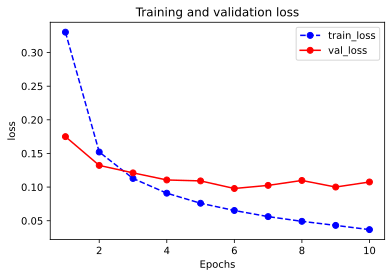

In [ ]:
plot_metric(history, 'loss')

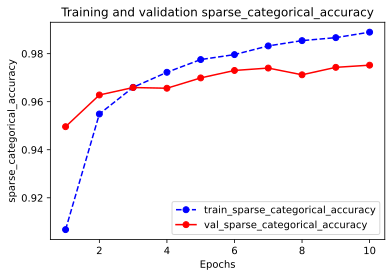

In [ ]:
plot_metric(history, 'sparse_categorical_accuracy')

In [ ]:
model.evaluate(x = x_test,y = y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1031 - sparse_categorical_accuracy: 0.9723


[0.10314247757196426, 0.9722999930381775]

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)[1]

# Print test accuracy
print('\n', 'Test accuracy:', score*100)


 Test accuracy: 97.22999930381775
